# Case Study: Resale Price Forecasting in an IT Leasing Context
<hr>

## Data integration

Write a function to create synthetic data that matches the context of IT leasing:

Examples of features to include:
- Feature Brand (description of the item, e.g., Dell XPS 15')
- Feature Type (e.g., notebook, desktop, server)
- Feature Age (age of the item in months when returned, often 12, 24, 36, also include some outliers)
- Feature List-Price (original list price of the item)

Other features describing the item...

Other features describin the client and conditions in which the item will be used. 

**Template for the following tasks:** https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/3_nb_predictive_analytics.ipynb


**For Saloni: use for now California Housing**
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
## Data Exploration

- Descriptive statistics
    - Focus on key features (e.g., target, age)
    - Showcase how to calc descriptives for all features
- Plots (same as before but graphically)
    - start with popular plots for individual features (e.g, histogram, box-plot)
    - correlation among numerical features (heat-map)
    - other ways to visualize all features (e.g., matrix of histograms/box-plots, etc.)
    
## Explanatory Model
- Run linear regression using statsmodels
- show summary 
- plot residuals (see template)

## Predictive Model
- Use linear model from above to predict some new (test) cases
- compute rmse
- XGB model
    - Do a grid-search to identify suitable meta-parameters
    - Use final XGB model to predict same test case and compute rmse

## Post-hoc analysis
- Produce feature importance plot for the XGB model
- Compare feature importance to linear regression
- Produce partial dependence plot one one feature for XGB and linear regression to show the difference



okground information for each section of the Jupyter Notebook tutorial focused on the California Housing dataset. It's designed to be educational for students new to Python and data analysis.

# Tutorial 2: Case_study 

## Introduction to Data Analysis with the Resale Price Prediction Dataset

In this tutorial, we will explore the Resale Price Prediction. We will cover data exploration, building an explanatory linear regression model, creating predictive models using both linear regression and XGBoost, conducting post-hoc analysis, and drawing conclusions based on our analysis.


# Section 1: Data Exploration

## Loading  the Resale Price Prediction
In this section, we will load the Resale Price Prediction dataset.The dataset for resale price prediction focuses on laptops that have been leased and returned, aiming to predict their resale prices. The resale price is influenced by various factors, including the original retail price, depreciation, release year, screen size, hard drive size, RAM size, weight, lease duration, and battery capacity. By leveraging these multiple features, the goal is to develop a predictive model that accurately estimates the resale value of laptops, providing valuable insights for effective pricing strategies in the secondary market.

In [130]:
import pandas as pd

# we will use pandas’ read_csv method to read data from our data csv  file
resale_price_prediction = pd.read_csv("output.csv", sep=",", encoding="utf-8")


##### Tip: if you get " ModuleNotFoundError: ... " This means your system doesnt not have a particular python package.
Python packages are best installed using pip commands.
Simply run "pip install <package>" this should installed the package and resolve the error on next run

## Taking a look the Resale Price Prediction

Lets have look at entire dataset

In [131]:
resale_price_prediction.head()

#The  is used to display the first few rows of the dataset after it has been loaded into a pandas DataFrame format

,Brand,Model,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Industry,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
0,Crest,Elevation Elite,2018,14,256,4,1021,1199,Media and Entertainment,24,20,84.06,577
1,Crest,Elevation Elite,2018,15,256,16,1094,2199,Event Management,60,66,90.61,738
2,Crest,Elevation Elite,2018,14,256,4,1021,1199,Media and Entertainment,24,26,91.70,601
3,Crest,Elevation Elite,2018,14,256,8,1021,1399,Aerospace and Defense,12,11,88.41,966
4,Crest,Elevation Elite,2018,15,256,16,1094,2199,Media and Entertainment,12,11,89.30,1680


 We can now check more into details the data types and if the dataset contains any missing value.

In [98]:
resale_price_prediction.info()

#The code is used to obtain information about the structure and characteristics of the dataset, which has been loaded into 
# a pandas DataFrame format. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             5000 non-null   object 
 1   Model                             5000 non-null   object 
 2   Release year                      5000 non-null   int64  
 3   Screen size (inches)              5000 non-null   int64  
 4   Hard drive size (GB)              5000 non-null   int64  
 5   RAM size (GB)                     5000 non-null   int64  
 6   Weight (grams)                    5000 non-null   int64  
 7   Retail price                      5000 non-null   int64  
 8   Industry                          5000 non-null   object 
 9   Contract Lease Duration (months)  5000 non-null   int64  
 10  Actual Lease Duration (months)    5000 non-null   int64  
 11  Battery capacity (%)              5000 non-null   float64
 12  Observ

## Descriptive Statistics

Descriptive statistics provide a summary of the dataset's key characteristics, helping us understand the distribution, central tendency, and spread of the data.


 But first, Lets first extract the data and assign it to a data frame

In [99]:
data = resale_price_prediction

#The code `data = california_housing.frame` assigns the DataFrame containing the California Housing dataset to a new variable named `data`.

##### Calculate descriptive statistics for key features

In [100]:
key_features = ['Brand', 'Model', 'Release year', 'Screen size (inches)', 'Hard drive size (GB)', 'RAM size (GB)', 'Weight (grams)', 'Retail price', 'Industry', 'Contract Lease Duration (months)'
                , 'Actual Lease Duration (months)', 'Battery capacity (%)', 'Observed resale price']
#The variable `key_features` stores a list of important feature names selected from the dataset.

key_features_statistics = data[key_features].describe()
#Computes summary statistics for the specified key features, creating a new DataFrame named key_features_statistics.

##### Display the statistics for key features

In [101]:
print("Descriptive Statistics for Key Features:")
print(key_features_statistics)

Descriptive Statistics for Key Features:
       Release year  Screen size (inches)  Hard drive size (GB)  \
count   5000.000000            5000.00000           5000.000000   
mean    2017.144600              14.19580            442.338400   
std        1.029516               2.59384            313.830965   
min     2015.000000              11.00000            128.000000   
25%     2016.000000              12.00000            256.000000   
50%     2018.000000              14.00000            256.000000   
75%     2018.000000              15.00000            512.000000   
max     2018.000000              19.00000           1028.000000   

       RAM size (GB)  Weight (grams)  Retail price  \
count    5000.000000     5000.000000   5000.000000   
mean        9.106400     1046.854600   2131.334000   
std         4.934121      207.358822    845.362183   
min         4.000000      673.000000    579.000000   
25%         4.000000      880.000000   1489.000000   
50%         8.000000     1021.0

## Plots
Now, let's create graphical plots

In [102]:
#This code imports essential libraries such as pandas, numpy, matplotlib, 
#seaborn, and suppresses future warnings, setting up the environment for data analysis and visualization.import pandas as pd

import numpy as np
import matplotlib.pyplot as plt  # Import the plt module for plotting
import seaborn as sns

#to subress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

array([[<Axes: title={'center': 'Release year'}>,
        <Axes: title={'center': 'Screen size (inches)'}>,
        <Axes: title={'center': 'Hard drive size (GB)'}>],
       [<Axes: title={'center': 'RAM size (GB)'}>,
        <Axes: title={'center': 'Weight (grams)'}>,
        <Axes: title={'center': 'Retail price'}>],
       [<Axes: title={'center': 'Contract Lease Duration (months)'}>,
        <Axes: title={'center': 'Actual Lease Duration (months)'}>,
        <Axes: title={'center': 'Battery capacity (%)'}>],
       [<Axes: title={'center': 'Observed resale price'}>, <Axes: >,
        <Axes: >]], dtype=object)

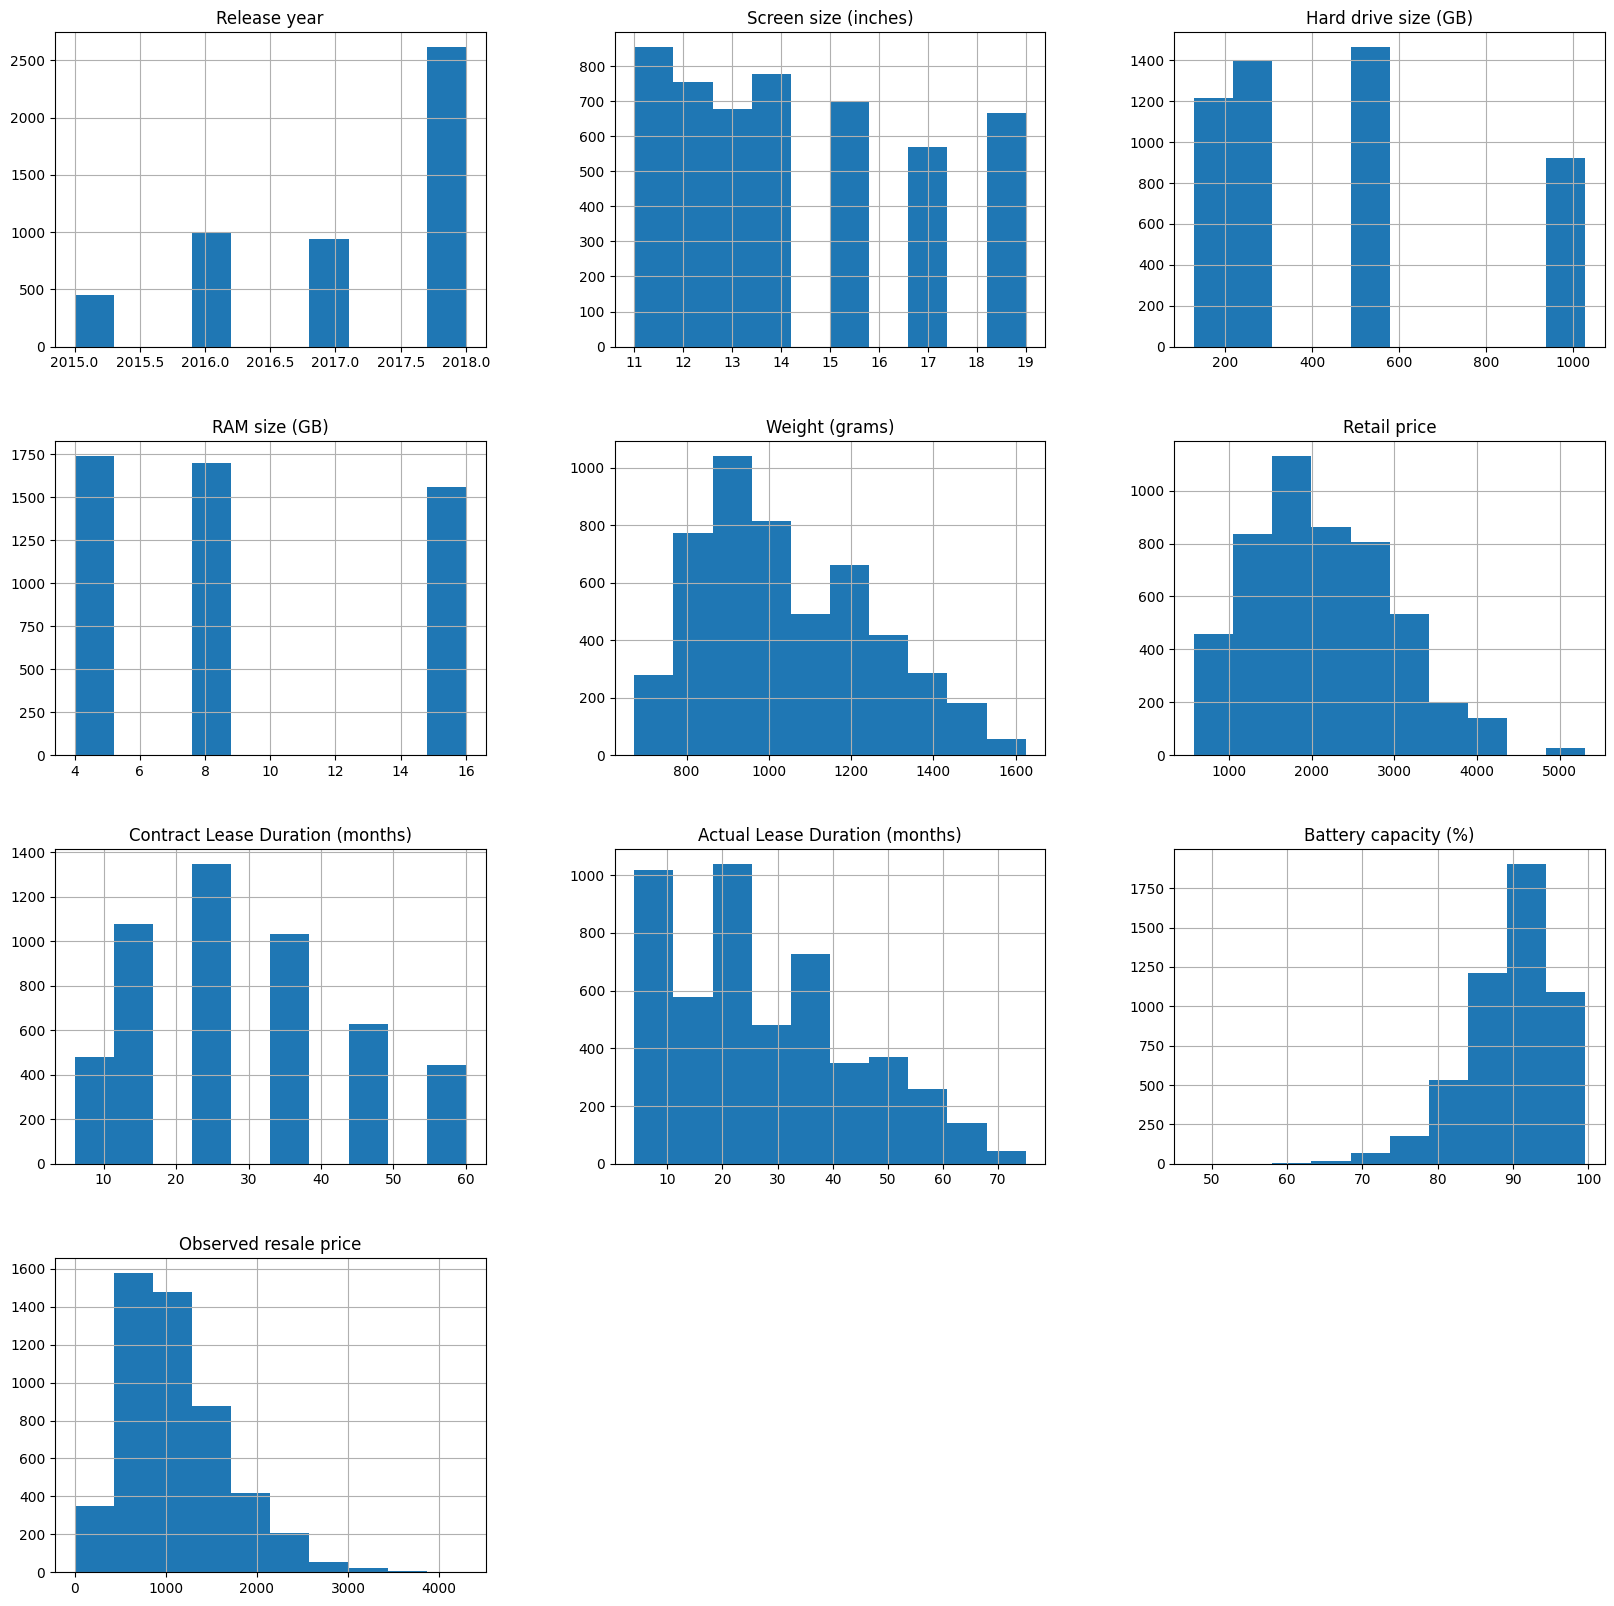

In [103]:
resale_price_prediction.hist(figsize=(20,20))
#This code generates histograms for each numeric column in the California Housing dataset, creating a grid of histograms with a specified figure size 
#of 20x20 for better visualization.

In [104]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  

##### Other ways to visualize all features (e.g., matrix of histograms/box-plots)

In [105]:
# Select a subset of numerical features for visualization
numerical_features = ['Screen size (inches)', 'Hard drive size (GB)', 'RAM size (GB)', 'Weight (grams)', 'Retail price', 'Contract Lease Duration (months)'
                , 'Actual Lease Duration (months)', 'Battery capacity (%)', 'Observed resale price']

                                  Screen size (inches)  Hard drive size (GB)  \
Screen size (inches)                          1.000000             -0.009740   
Hard drive size (GB)                         -0.009740              1.000000   
RAM size (GB)                                -0.022307             -0.139822   
Weight (grams)                                0.929119              0.018549   
Retail price                                  0.422365              0.747809   
Contract Lease Duration (months)             -0.005225             -0.027821   
Actual Lease Duration (months)               -0.009433             -0.025463   
Battery capacity (%)                         -0.006737             -0.009982   
Observed resale price                         0.315837              0.520548   

                                  RAM size (GB)  Weight (grams)  Retail price  \
Screen size (inches)                  -0.022307        0.929119      0.422365   
Hard drive size (GB)                 

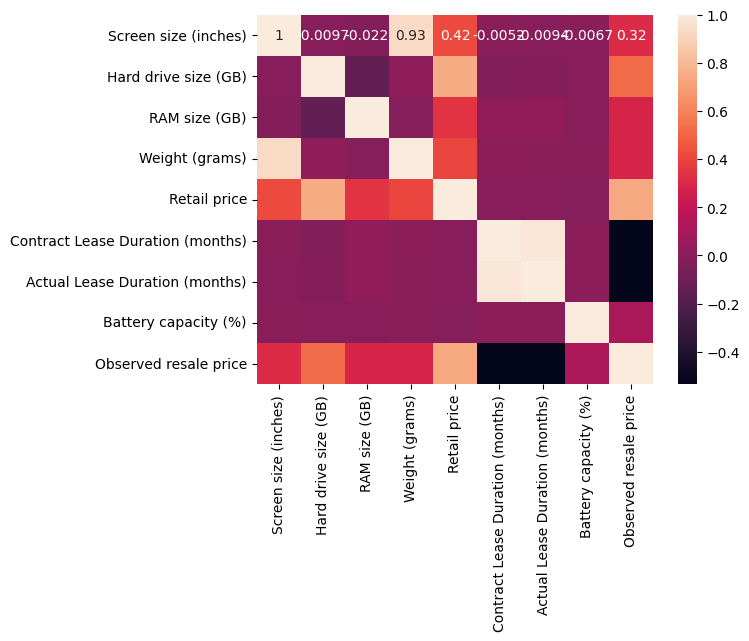

In [106]:
 df=california_housing
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df[numerical_features].corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df[numerical_features].corr(), annot=True)
  
# displaying heatmap
mp.show()

### Interpretation:
##### - We started by creating a histogram for the 'MedInc' (Median Income) feature to visualize its distribution.
- Next, we created a box plot for the 'HouseAge' feature to understand its central tendency and spread.
- The correlation heatmap provides a graphical representation of the relationships among numerical features.
- Finally, we used a matrix of histograms and box plots to visualize the distribution and relationships of all selected numerical features.

##### These visualizations help in understanding the data distribution, identifying outliers, and exploring relationships between features 

# Section 2: Explanatory Model
## Run linear regression using statsmodels

In [107]:
# Define the target variable and predictor(s)
selected_columns = [ 'Screen size (inches)', 'Hard drive size (GB)', 'RAM size (GB)', 'Weight (grams)', 'Retail price', 'Contract Lease Duration (months)'
                , 'Actual Lease Duration (months)', 'Battery capacity (%)']
X = data[selected_columns]

y = data['Observed resale price']

In [108]:
# Add a constant (intercept) term to the predictor(s)
import statsmodels.api as sm
X = sm.add_constant(X)

In [109]:
# Create a linear regression model
model = sm.OLS(y, X).fit()

In [110]:
# Show summary of the linear regression model
print("Linear Regression Summary:")
print(model.summary())

Linear Regression Summary:
                              OLS Regression Results                             
Dep. Variable:     Observed resale price   R-squared:                       0.852
Model:                               OLS   Adj. R-squared:                  0.852
Method:                    Least Squares   F-statistic:                     3595.
Date:                   Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:12:26   Log-Likelihood:                -34063.
No. Observations:                   5000   AIC:                         6.814e+04
Df Residuals:                       4991   BIC:                         6.820e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

### Interpretation:
###### - We first specify the target variable 'y' (median house value) and the predictors ('X').
- We add a constant term to the predictors to include the intercept in the model.
- The `sm.OLS()` function fits a linear regression model.
- The `model.summary()` method displays a summary of the regression results, including coefficients, p-values, R-squared, and more.

### Plot Residuals
##### Residuals are the differences between the actual and predicted values of the target variable.

In [111]:
# Calculate residuals
residuals = model.resid

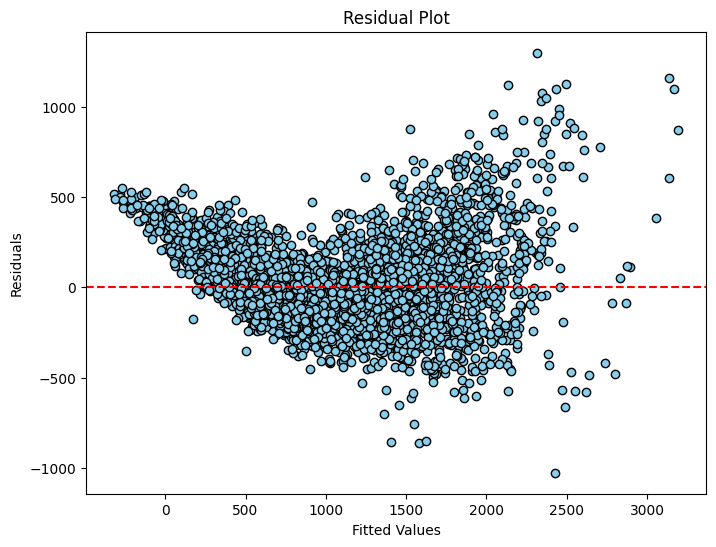

In [112]:
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, color='skyblue', edgecolor='black')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Interpretation:
- Residuals represent the errors in our model's predictions.
- In the residual plot, we check if the residuals are randomly scattered around zero, which is a good sign.
- A pattern in the residuals could indicate a problem with the model.

# Section 3: Predictive Model

In [113]:
# Assuming you have already trained the linear regression model (as shown in the previous section), let's continue.
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#This code splits the dataset into training and testing sets, with `X` representing the input features and `y` representing the target variable. 
#The split ratio is 80% for training and 20% for testing, and the `random_state=42` ensures reproducibility of the split.


In [115]:
# Use the trained linear regression model to make predictions on the test set
linear_predictions = model.predict(X_test)

In [116]:
# Compute Root Mean Squared Error (RMSE) for the linear model
from sklearn.metrics import mean_squared_error

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Model RMSE:", linear_rmse)

Linear Model RMSE: 231.84315081178076



Explanation:

We split the dataset into training and testing sets using train_test_split. The test_size parameter determines the proportion of data used for testing.
We use the trained linear regression model (model) to make predictions on the test set (X_test).
RMSE is computed using mean_squared_error from scikit-learn to evaluate the model's performance on the test data.
XGBoost Model with Grid Search
Now, we'll build an XGBoost model and perform a grid search to find suitable hymeters.perpara

In [117]:
# Import necessary libraries for XGBoost and Grid Search
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [118]:
# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

In [119]:
# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best XGBoost model from the grid search
best_xgb_model = grid_search.best_estimator_

# Use the best XGBoost model to make predictions on the test set
xgb_predictions = best_xgb_model.predict(X_test)

# Compute RMSE for the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Print the RMSE
print("XGBoost Model RMSE:", xgb_rmse)


XGBoost Model RMSE: 81.90499591414137



##### Explanation:

We define a parameter grid (param_grid) that specifies a range of hyperparameters for the XGBoost model.
We create an XGBoost regressor (xgb_regressor) that we will use for the grid search.
Grid search (GridSearchCV) is performed with cross-validation to find the best combination of hyperparameters.
The best XGBoost model is obtained from the grid search results.
We use the best XGBoost model to make predictions on the test set (X_test) and compute the RMSE.
This code helps you build an XGBoost model with optimized hyperparameters and evaluates its performance using RMSE on thea.






# Section 4: Post-hoc analysis

##### Post-hoc analysis is an essential step in understanding the performance of your models and the importance of different features. In this case, we'll perform post-hoc analysis on both an XGBoost model and a Linear Regression model for the California Housing dataset. We'll create feature importance plots and partial dependence plots to compare the two models.



 1. Produce Feature Importance Plot for the XGBoost Model:**

Feature importance helps us understand which features have the most impact on the model's predictions. XGBoost provides a built-in feature importance attribute that we can use to plot the feature importan do 



# Get feature importances from the XGBoost model
feature_importance_xgb = xgb_regressor.feature_importanc

In [122]:
#Get feature importances from the XGBoost model

feature_importance_xgb = xgb_regressor.feature_importances_


In [121]:
# Fit the XGBoost model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

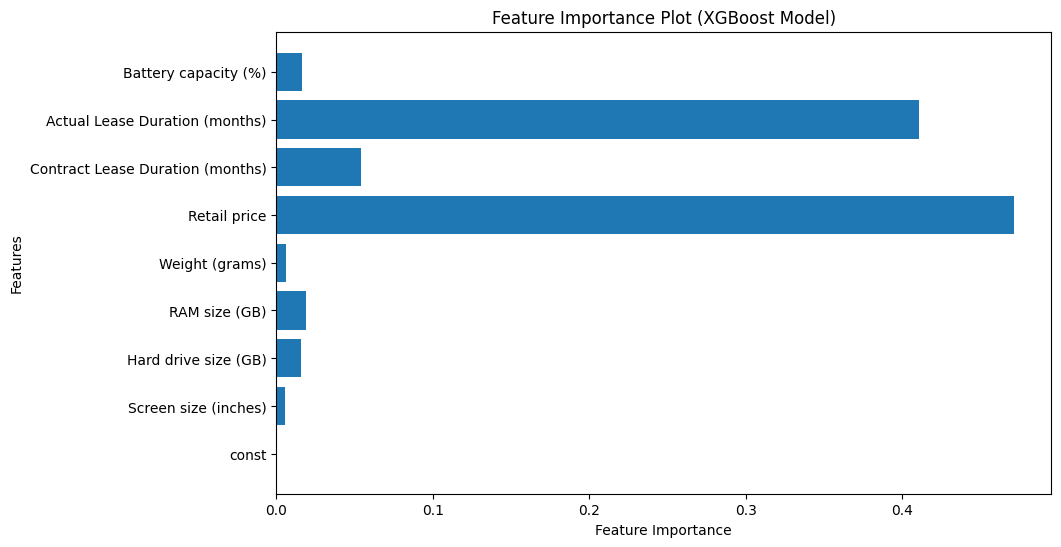

In [123]:
# Create a feature importance plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_xgb)), feature_importance_xgb, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (XGBoost Model)')
plt.show()

####Explanation:

We first fit an XGBoost regressor on the training data.
Then, we extract the feature importances using xgb_regressor.feature_importances_.
Finally, we create a horizontal bar plot to visualize the feature importance scores.

####  Compare Feature Importance to Linear Regression:

To compare feature importance between the XGBoost model and Linear Regression, you can create a similar plot for the Linear Regression model and visually compare the two. Here's how you can do it:

In [124]:
# Fit the Linear Regression model
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [125]:
# Get feature coefficients from the Linear Regression model
feature_coefficients = linear_regressor.coef_

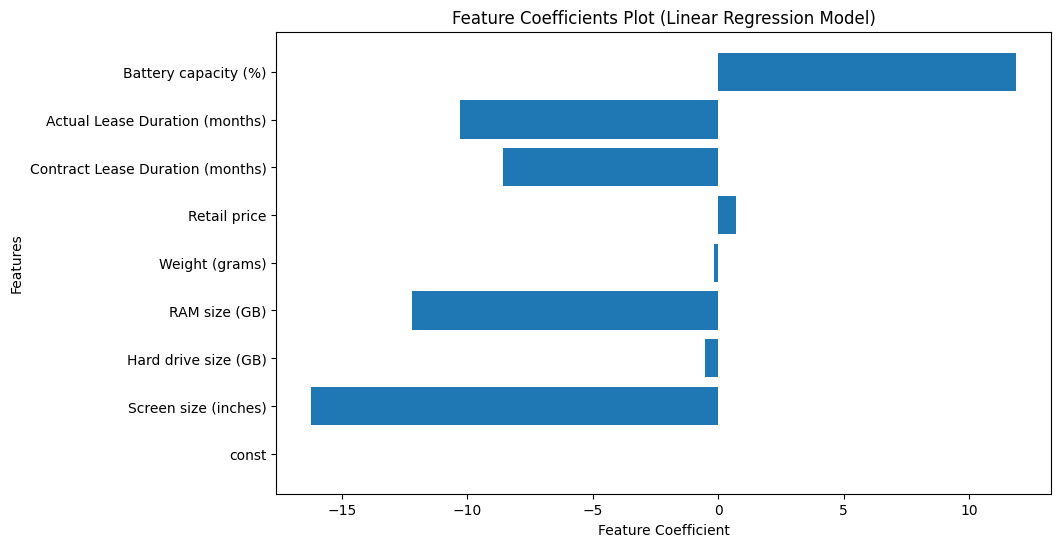

In [126]:
# Create a feature importance plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_coefficients)), feature_coefficients, tick_label=X.columns)
plt.xlabel('Feature Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients Plot (Linear Regression Model)')
plt.show()

#### Explanation:

We fit a Linear Regression model on the training data.
Then, we extract the feature coefficients using linear_regressor.coef_.
We create a horizontal bar plot to visualize the feature coefficients.

####  Produce Partial Dependence Plot for One Feature (XGBoost and Linear Regression):

Partial dependence plots help us understand the relationship between a specific feature and the predicted target while keeping other features constant. Here's how to create partial dependence plots for one feature for both models:

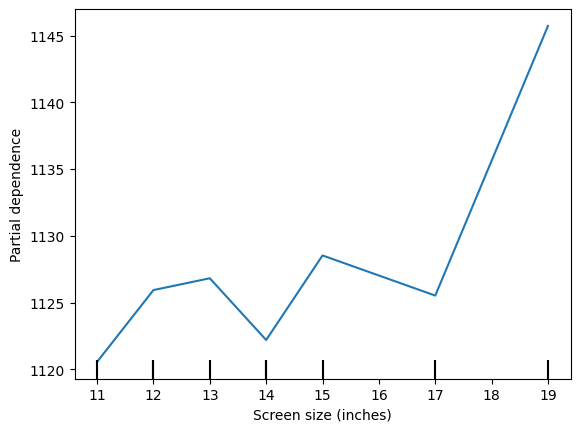

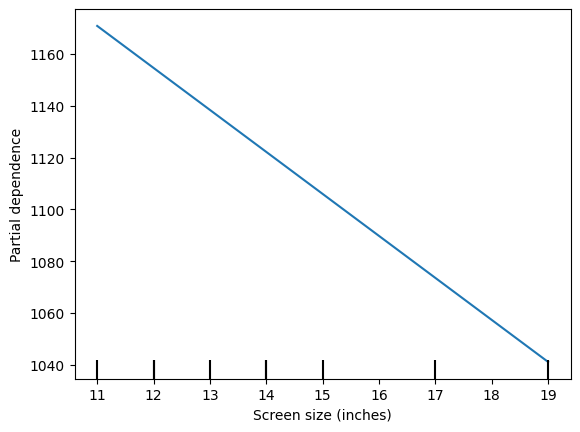

In [127]:
# Import the necessary libraries for partial dependence display
from sklearn.inspection import PartialDependenceDisplay

# Select the feature you want to analyze (e.g., 'MedInc')
feature_to_plot = 'Screen size (inches)'

# Create a PartialDependenceDisplay object for XGBoost model
xgb_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    xgb_regressor, X_train, features=[feature_to_plot]
)

# Create a PartialDependenceDisplay object for Linear Regression model
linear_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    linear_regressor, X_train, features=[feature_to_plot]
)